In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd



In [12]:

df = pd.read_csv('umap_embedding_with_clusters_2d.csv')

# Mostrar las primeras filas del DataFrame
df


,UMAP_1,UMAP_2,cluster,genus_species,phenotype
0,7.834035,-0.371943,0,Acinetobacter_baumannii,Resistant
1,12.426935,12.792373,2,Acinetobacter_baumannii,Resistant
2,-5.388499,2.077158,4,Acinetobacter_baumannii,Resistant
3,-10.489730,23.076149,1,Acinetobacter_baumannii,Resistant
4,21.863367,-5.975270,3,Acinetobacter_baumannii,Resistant
...,...,...,...,...,...
4756,7.867676,-0.781629,0,Salmonella_enterica,Susceptible
4757,5.692376,0.578299,0,Salmonella_enterica,Susceptible
4758,7.222486,-0.223580,0,Salmonella_enterica,Susceptible
4759,12.956901,13.785368,2,Salmonella_enterica,Susceptible


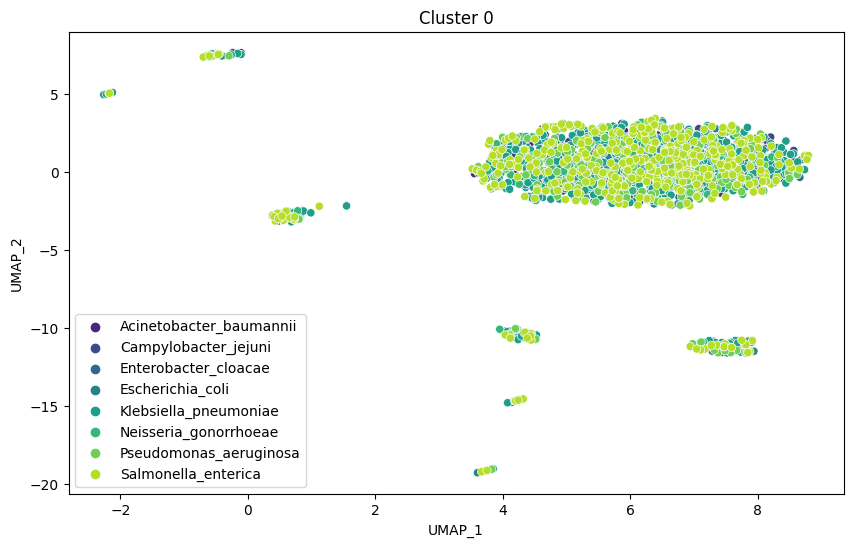

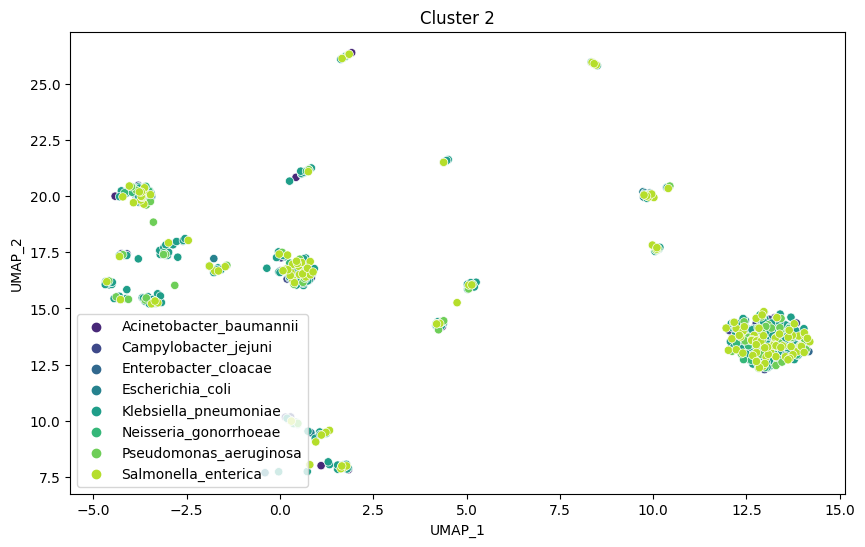

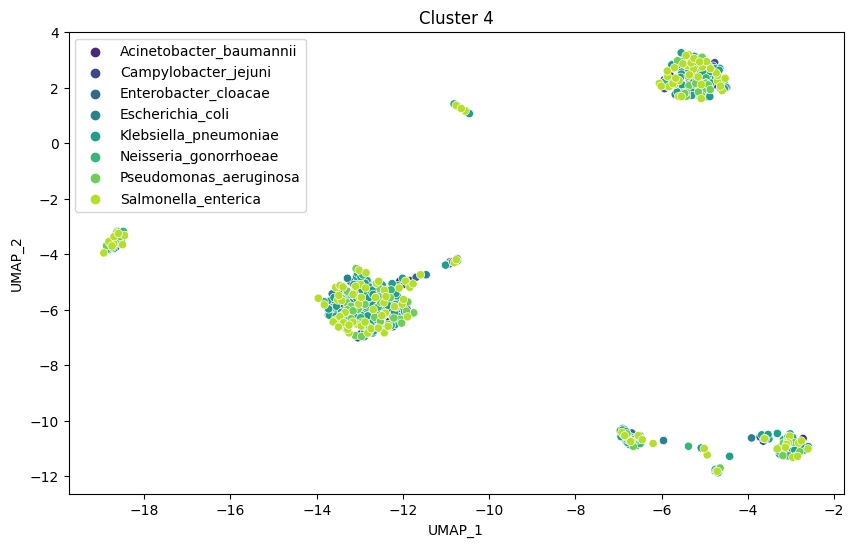

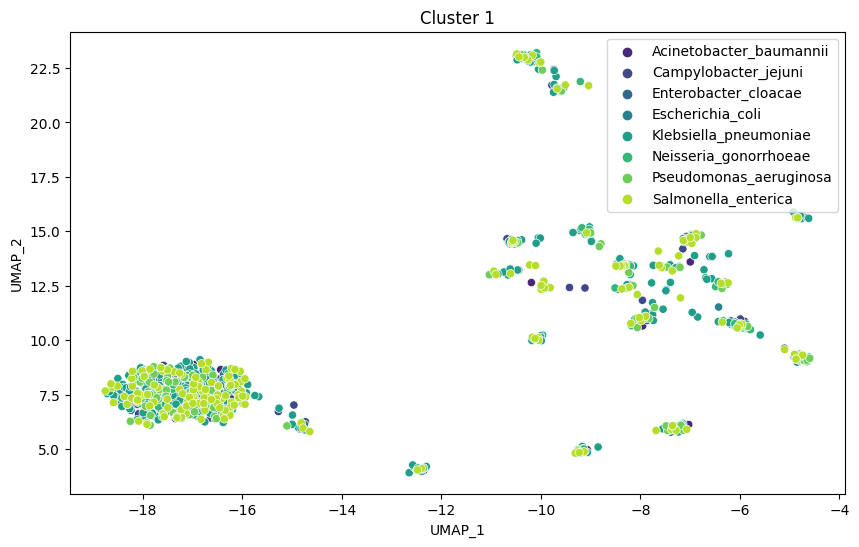

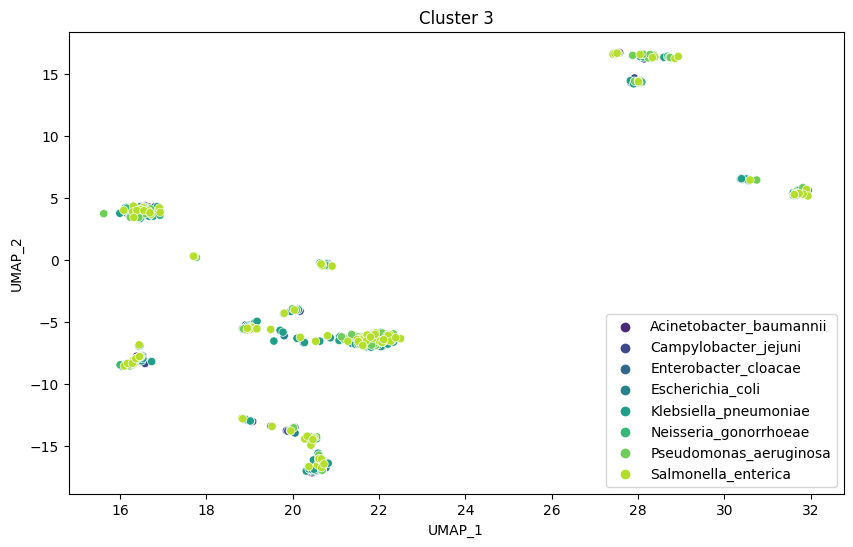

In [14]:
# Crear un gráfico por cada cluster
clusters = df['cluster'].unique()
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='UMAP_1', y='UMAP_2', 
        hue='genus_species', 
        data=cluster_data, 
        palette='viridis', 
        legend='full'
    )
    plt.title(f'Cluster {cluster}')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.legend(loc='best')
    plt.show()

      UMAP_1     UMAP_2  cluster            genus_species  phenotype
0   7.834035  -0.371943        0  Acinetobacter_baumannii  Resistant
1  12.426935  12.792373        2  Acinetobacter_baumannii  Resistant
2  -5.388499   2.077158        4  Acinetobacter_baumannii  Resistant
3 -10.489730  23.076149        1  Acinetobacter_baumannii  Resistant
4  21.863367  -5.975270        3  Acinetobacter_baumannii  Resistant


usetex mode requires dvipng.


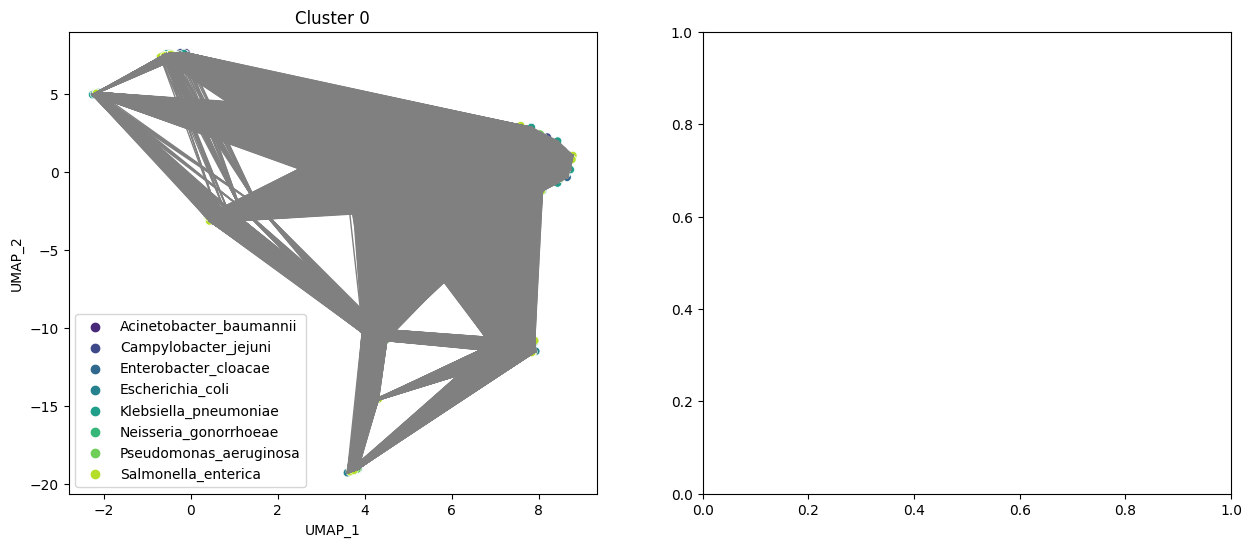

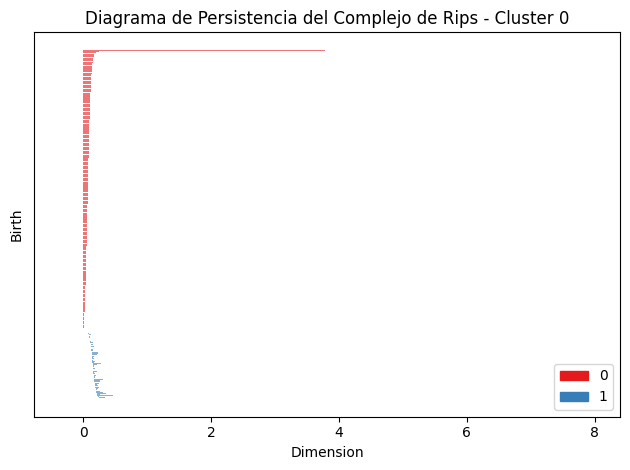

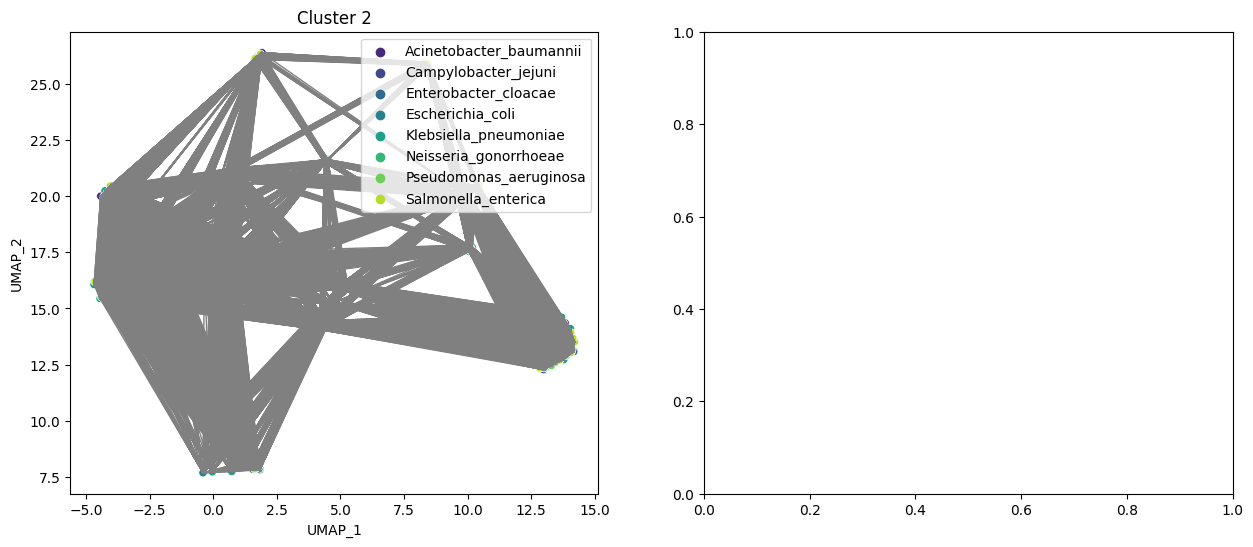

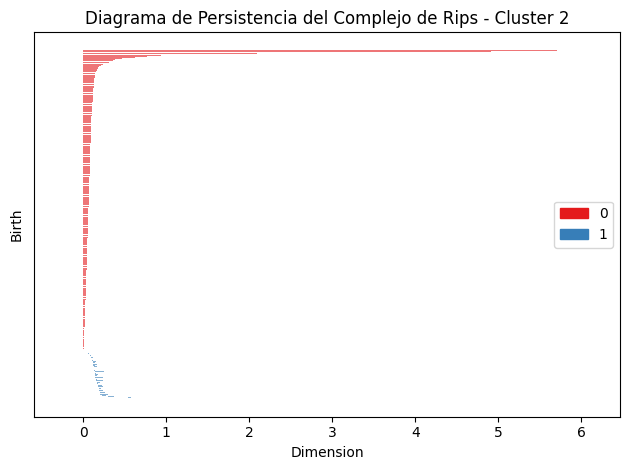

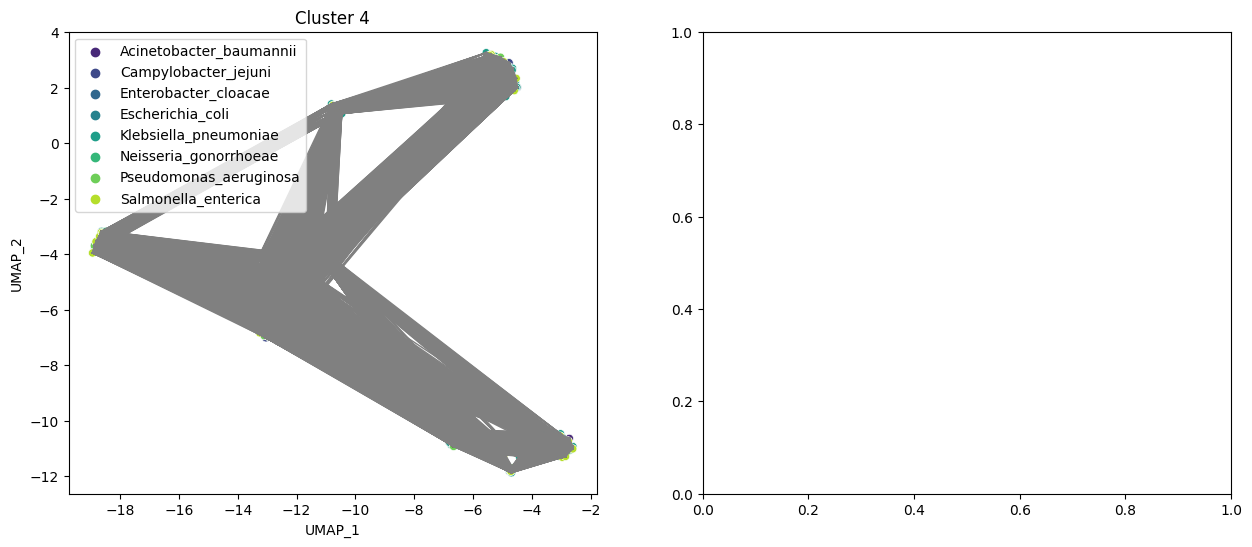

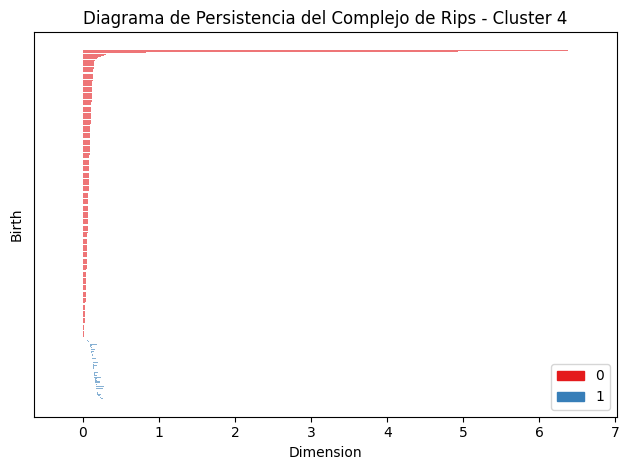

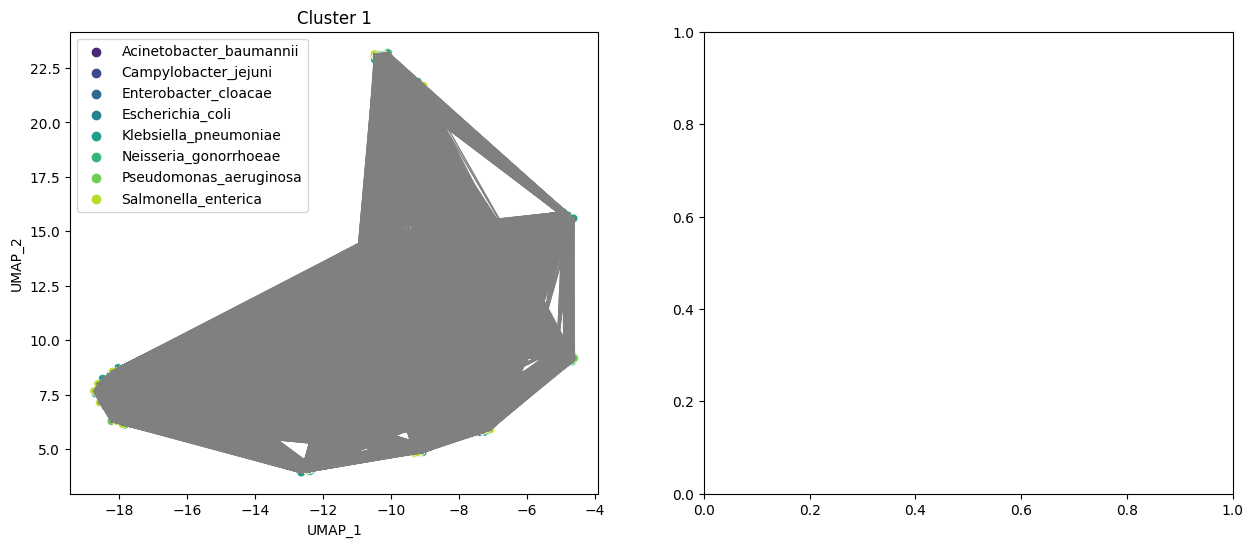

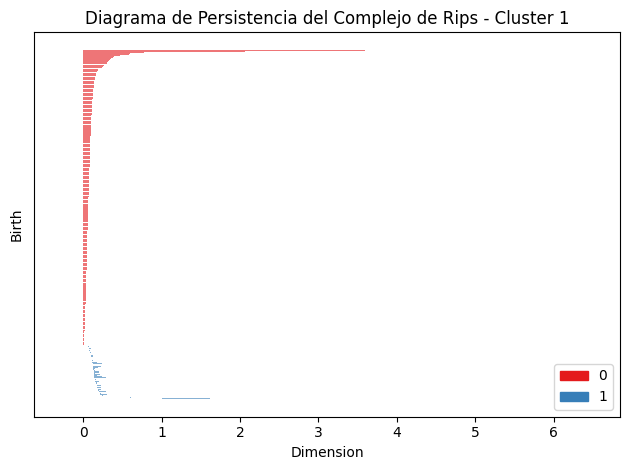

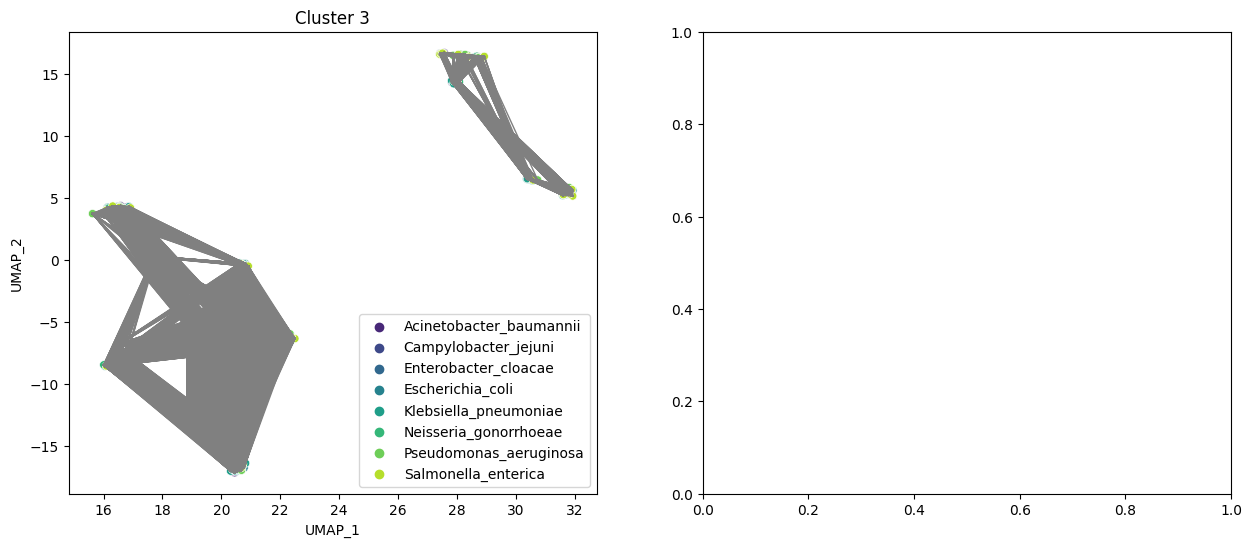

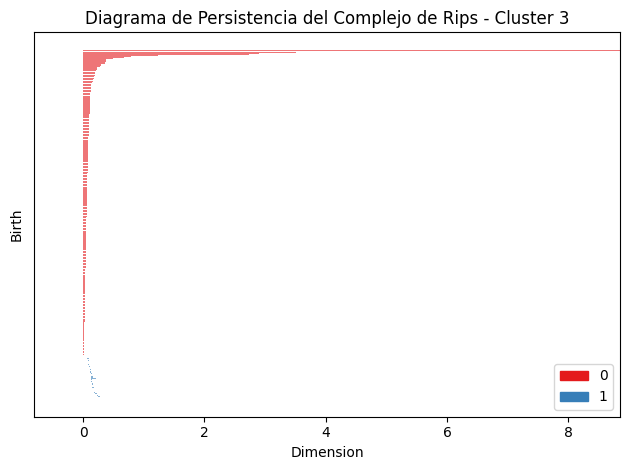

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('umap_embedding_with_clusters_2d.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Crear un gráfico por cada cluster y calcular su diagrama de persistencia
clusters = df['cluster'].unique()
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    plt.figure(figsize=(15, 6))

    # Crear el gráfico de dispersión
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x='UMAP_1', y='UMAP_2', 
        hue='genus_species', 
        data=cluster_data, 
        palette='viridis', 
        legend='full'
    )
    plt.title(f'Cluster {cluster}')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.legend(loc='best')

    # Preparar los puntos para Gudhi
    puntos = cluster_data[['UMAP_1', 'UMAP_2']].values

    # Calcular el complejo de Rips
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=10)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Visualizar el complejo de Rips
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [cluster_data.iloc[i]['UMAP_1'] for i in arista]
            y = [cluster_data.iloc[i]['UMAP_2'] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_barcode(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips - Cluster {cluster}')
    plt.xlabel('Dimension')
    plt.ylabel('Birth')

    plt.tight_layout()
    plt.show()


In [18]:
#Matriz de distancias
from scipy.spatial.distance import hamming, pdist, squareform
matrix_distance=pdist(df[['UMAP_1','UMAP_2']], metric='euclidean')
matrix_distance

array([13.94252249, 13.44743474, 29.75858464, ..., 15.13717716,
       11.13222612, 25.82658231])

In [19]:
np.shape(matrix_distance)[0]
maximo=matrix_distance.max()
print(maximo)
minimo=matrix_distance.min()
print(minimo)
promedio=matrix_distance.mean()
print(promedio)

52.01533391464344
0.00032694427659772033
17.571124395872072


      UMAP_1     UMAP_2  cluster            genus_species  phenotype
0   7.834035  -0.371943        0  Acinetobacter_baumannii  Resistant
1  12.426935  12.792373        2  Acinetobacter_baumannii  Resistant
2  -5.388499   2.077158        4  Acinetobacter_baumannii  Resistant
3 -10.489730  23.076149        1  Acinetobacter_baumannii  Resistant
4  21.863367  -5.975270        3  Acinetobacter_baumannii  Resistant


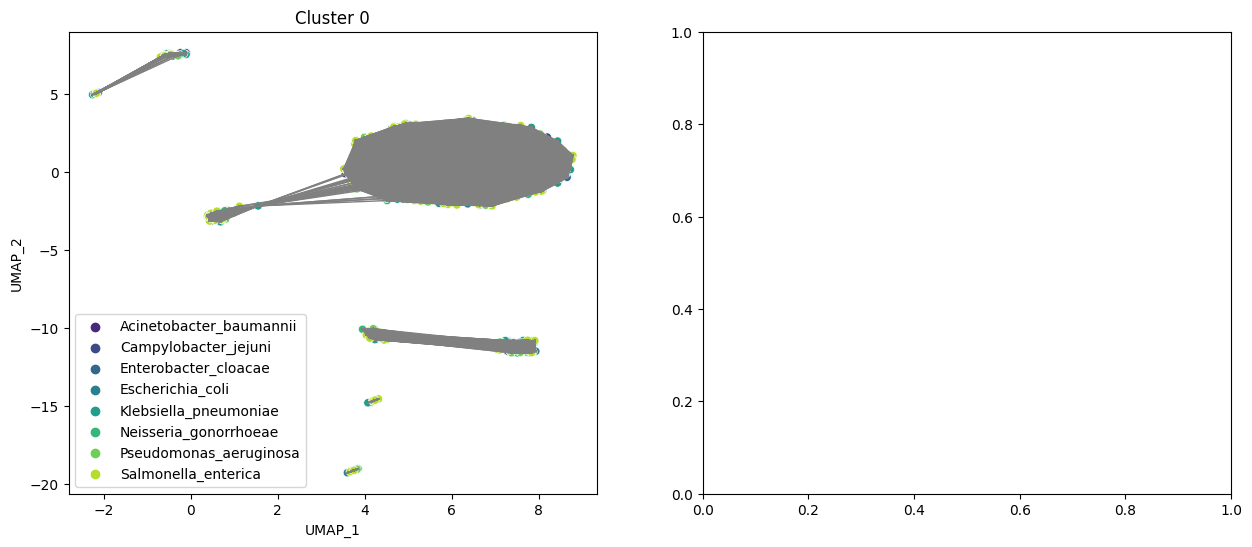

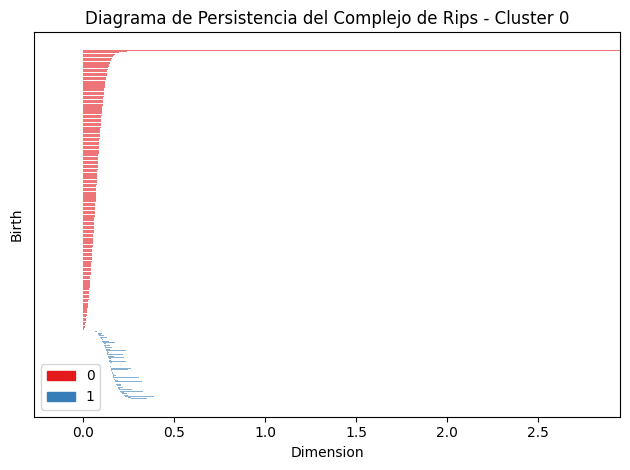

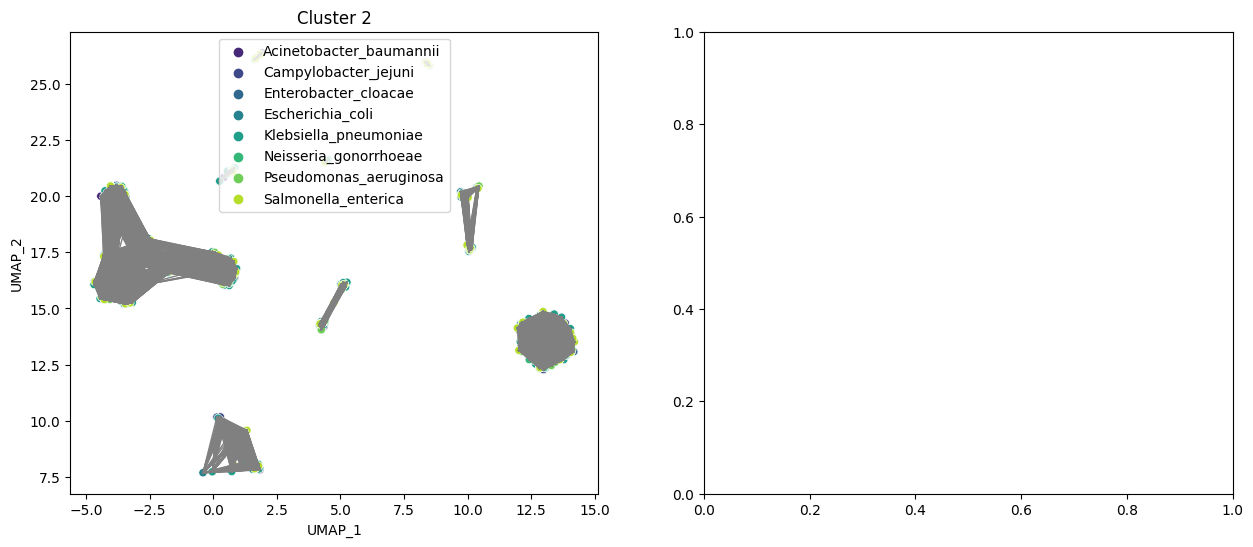

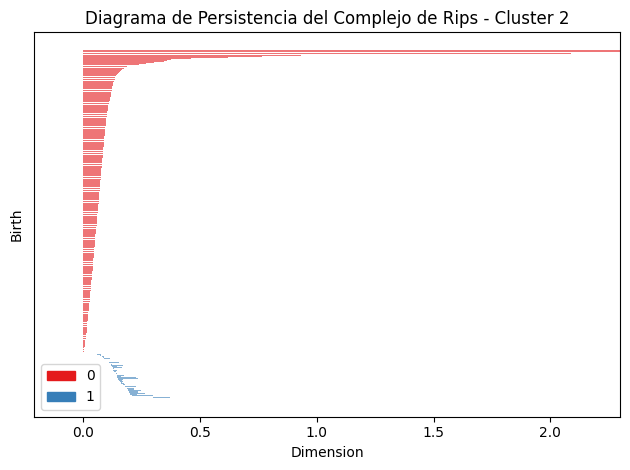

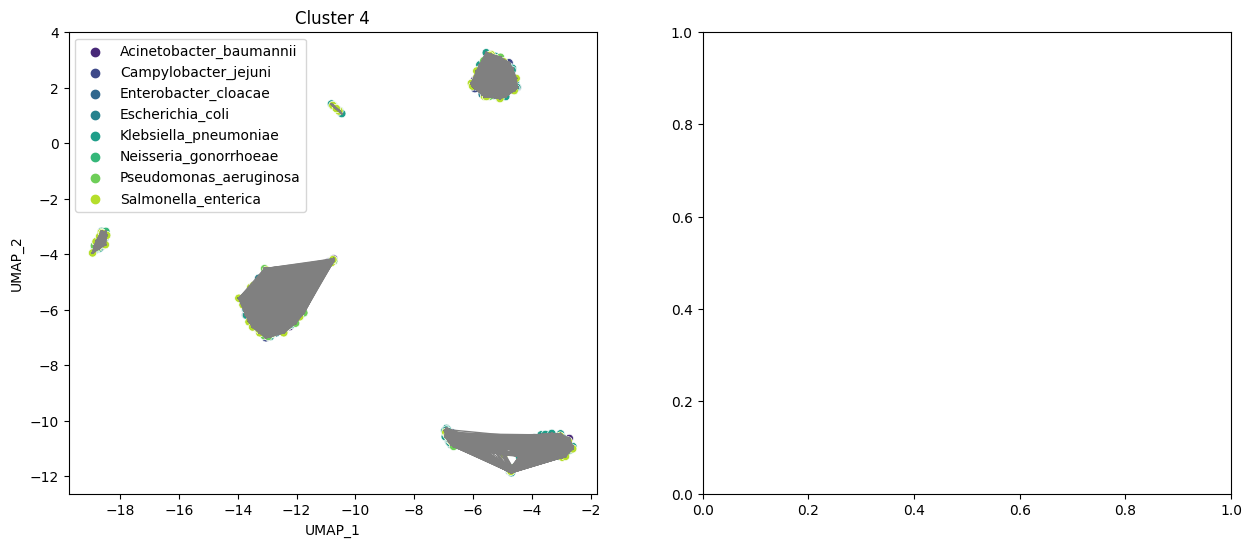

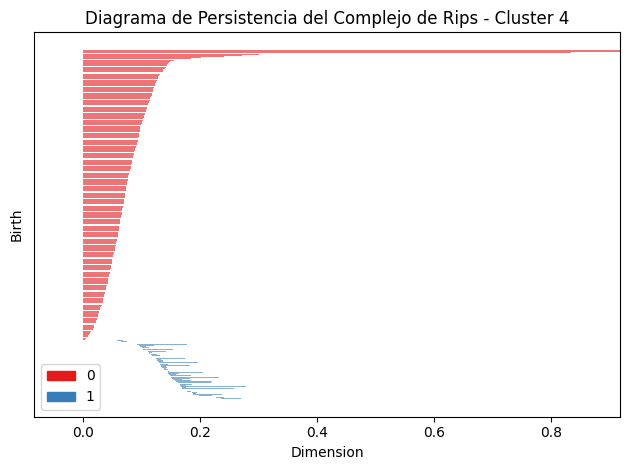

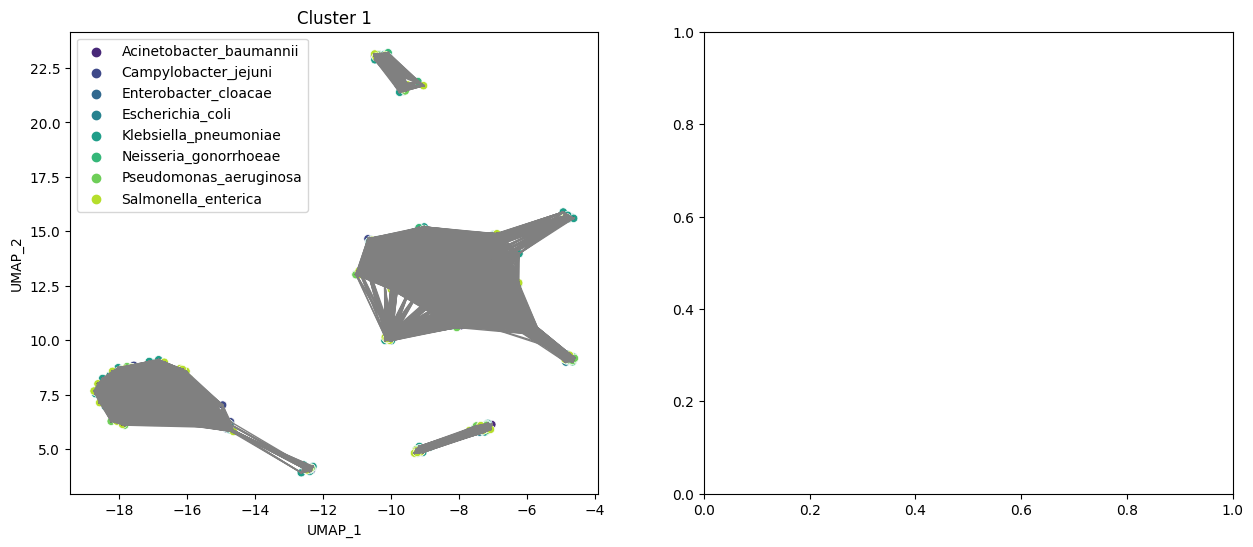

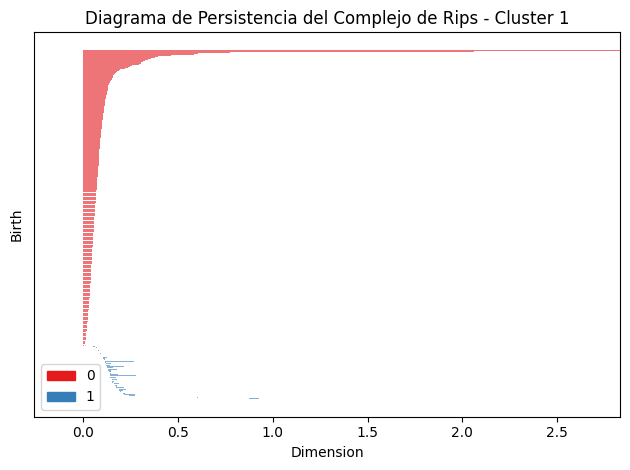

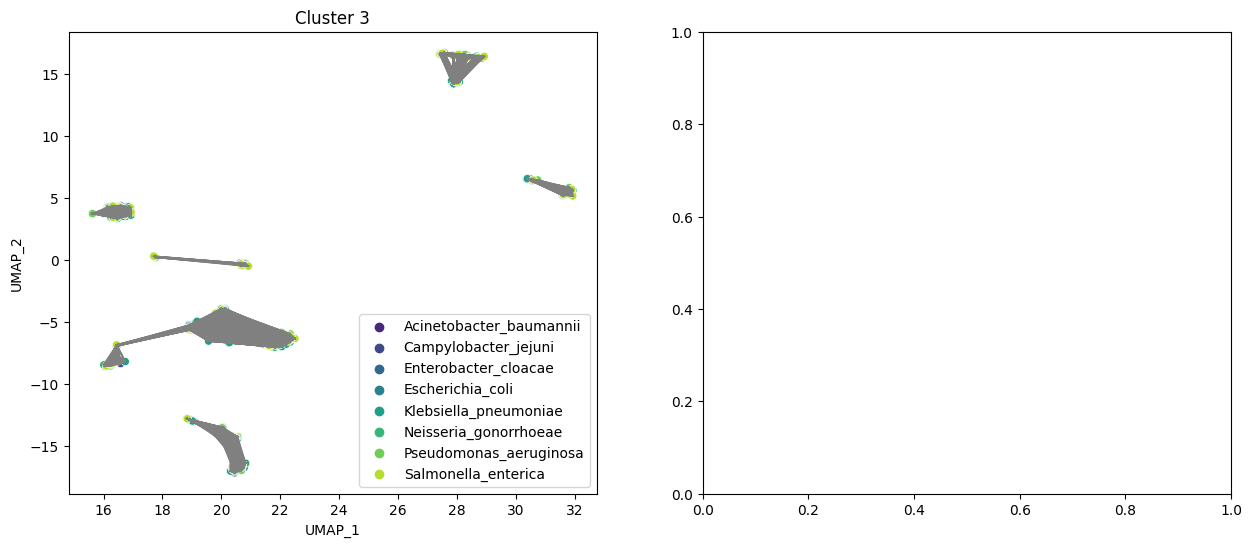

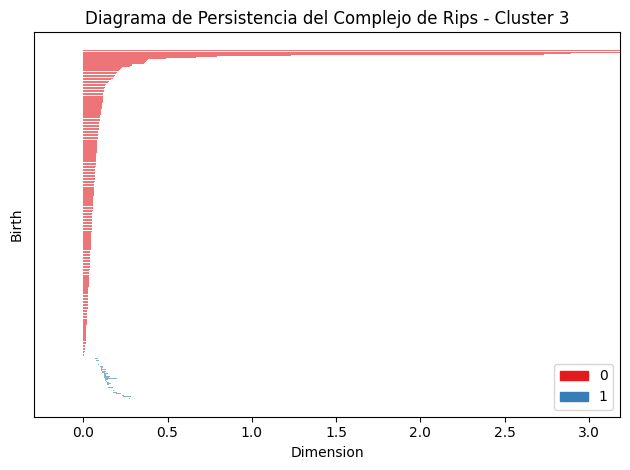

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('umap_embedding_with_clusters_2d.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Crear un gráfico por cada cluster y calcular su diagrama de persistencia
clusters = df['cluster'].unique()
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    plt.figure(figsize=(15, 6))

    # Crear el gráfico de dispersión
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x='UMAP_1', y='UMAP_2', 
        hue='genus_species', 
        data=cluster_data, 
        palette='viridis', 
        legend='full'
    )
    plt.title(f'Cluster {cluster}')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.legend(loc='best')

    # Preparar los puntos para Gudhi
    puntos = cluster_data[['UMAP_1', 'UMAP_2']].values

    # Calcular el complejo de Rips
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=3)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Visualizar el complejo de Rips
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [cluster_data.iloc[i]['UMAP_1'] for i in arista]
            y = [cluster_data.iloc[i]['UMAP_2'] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_barcode(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips - Cluster {cluster}')
    plt.xlabel('Dimension')
    plt.ylabel('Birth')

    plt.tight_layout()
    plt.show()


      UMAP_1     UMAP_2  cluster            genus_species  phenotype
0   7.834035  -0.371943        0  Acinetobacter_baumannii  Resistant
1  12.426935  12.792373        2  Acinetobacter_baumannii  Resistant
2  -5.388499   2.077158        4  Acinetobacter_baumannii  Resistant
3 -10.489730  23.076149        1  Acinetobacter_baumannii  Resistant
4  21.863367  -5.975270        3  Acinetobacter_baumannii  Resistant


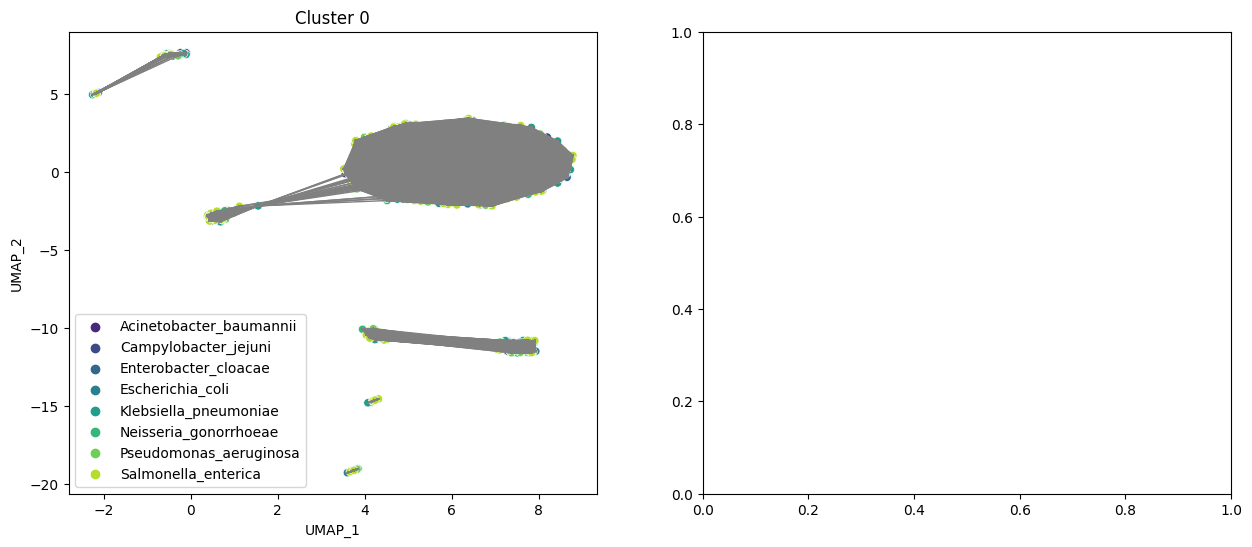

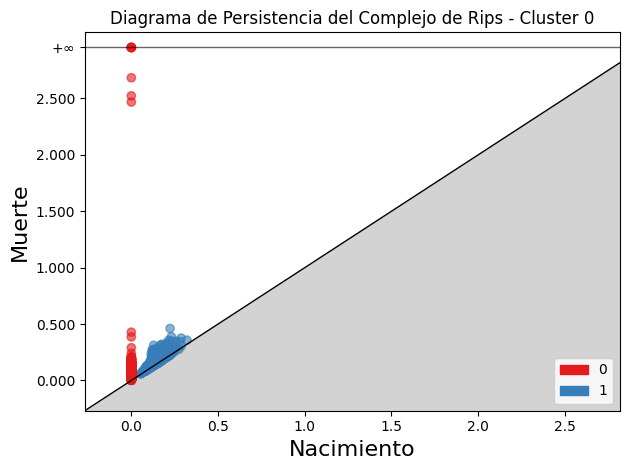

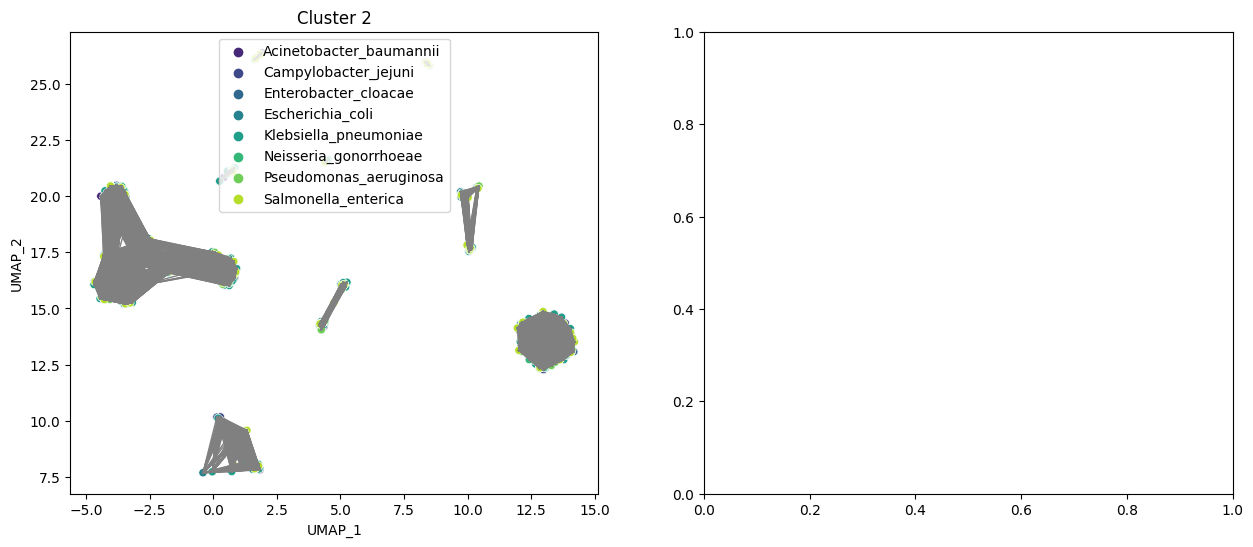

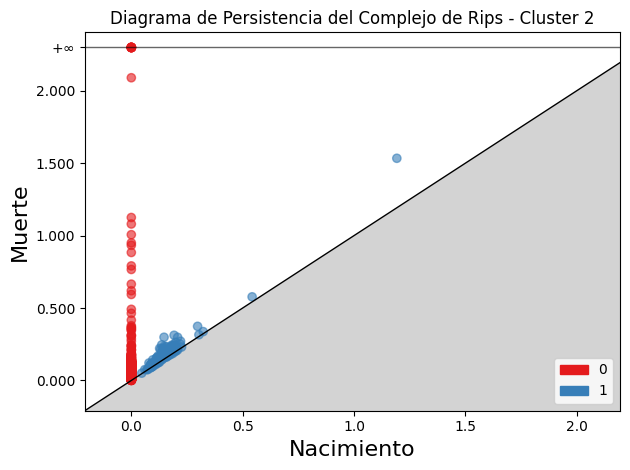

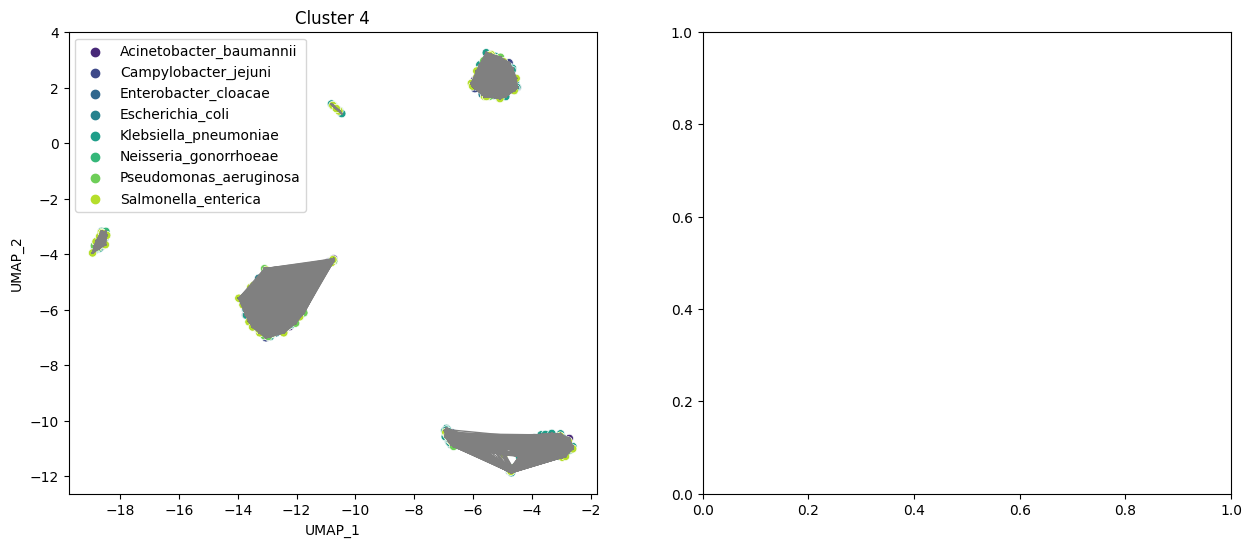

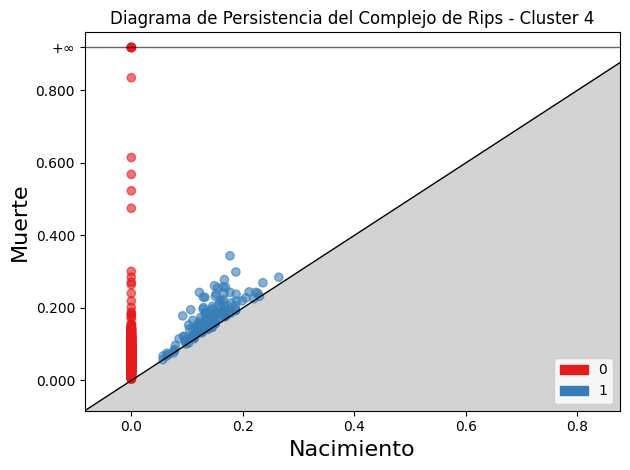

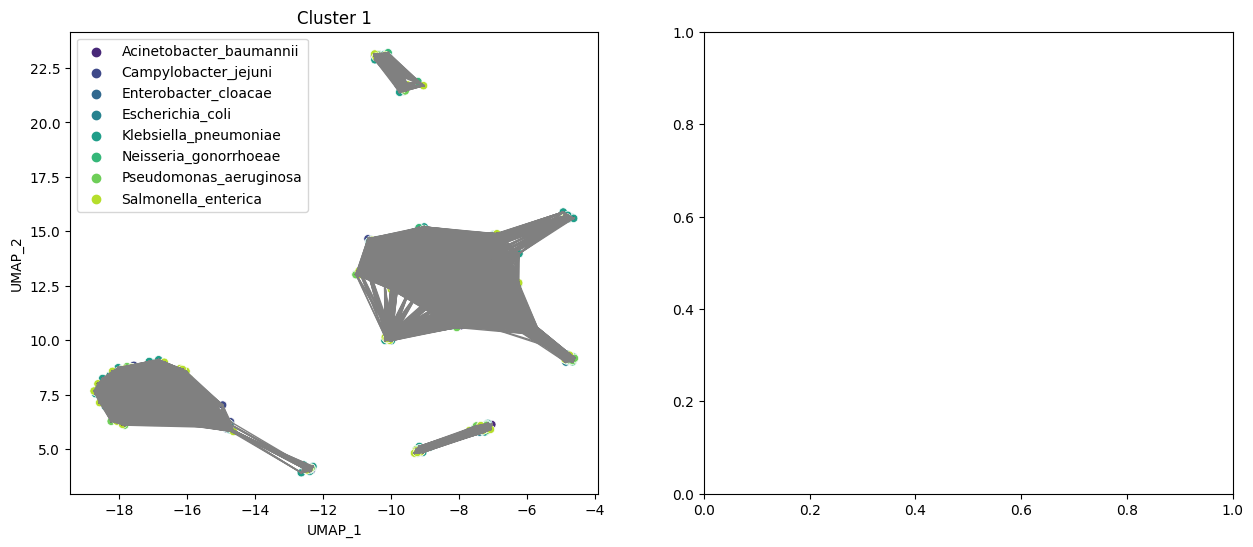

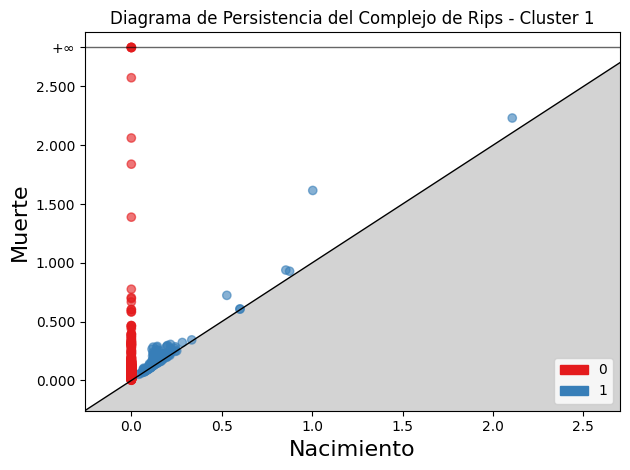

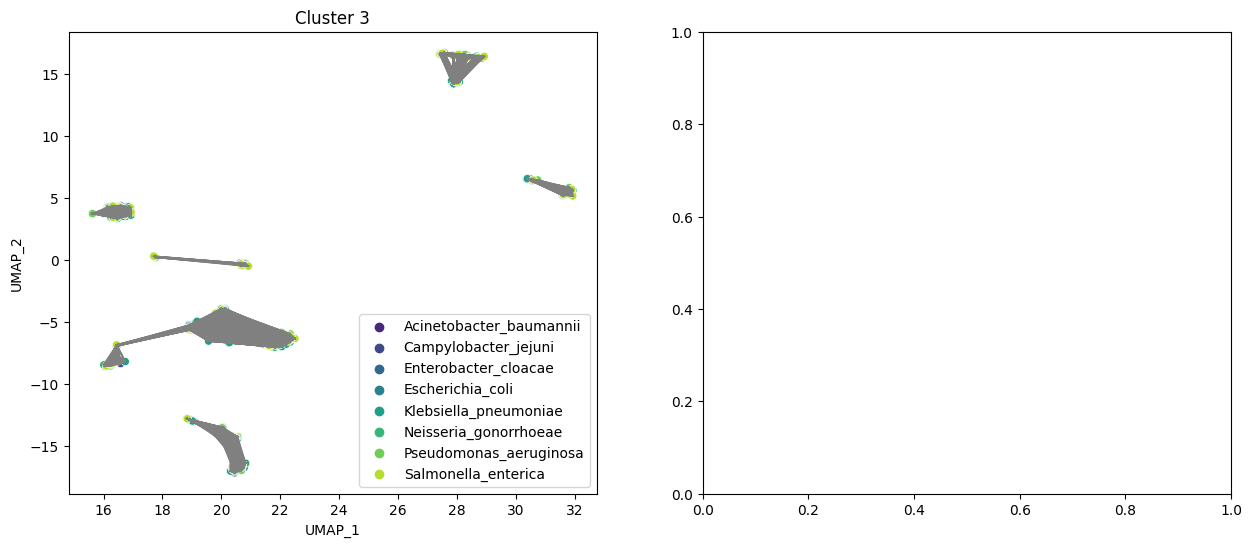

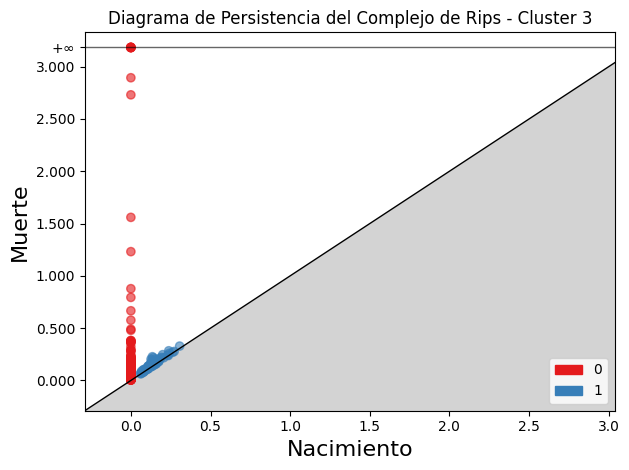

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('umap_embedding_with_clusters_2d.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

# Crear un gráfico por cada cluster y calcular su diagrama de persistencia
clusters = df['cluster'].unique()
for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    plt.figure(figsize=(15, 6))

    # Crear el gráfico de dispersión
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x='UMAP_1', y='UMAP_2', 
        hue='genus_species', 
        data=cluster_data, 
        palette='viridis', 
        legend='full'
    )
    plt.title(f'Cluster {cluster}')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.legend(loc='best')

    # Preparar los puntos para Gudhi
    puntos = cluster_data[['UMAP_1', 'UMAP_2']].values

    # Calcular el complejo de Rips
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=3)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Visualizar el complejo de Rips
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [cluster_data.iloc[i]['UMAP_1'] for i in arista]
            y = [cluster_data.iloc[i]['UMAP_2'] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips - Cluster {cluster}')
    plt.xlabel('Nacimiento')
    plt.ylabel('Muerte')

    plt.tight_layout()
    plt.show()
